In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os

%matplotlib inline

In [6]:
PATH = os.path.abspath('..')

with open (f'{PATH}/results/environment/transition_results.txt', 'r') as f:
    lines = f.readlines()
    env_results = np.array([[np.mean([float(l[10:14]), float(l[15:19])]),
                             float(l[21:27]),
                             float(l[32:38])
                            ] 
        for l in lines])

In [7]:
# merge with previous tests
overdense  = [0.9, 0.3269, 0.0066] # a40 valid overdense
underdense = [0.1, 0.2184, 0.0022] # a40 valid underdense

env_results = np.vstack([underdense, env_results, overdense])

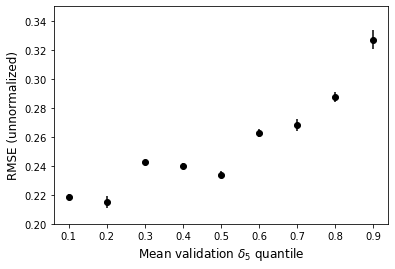

In [8]:
plt.errorbar(env_results[:,0],
             env_results[:,1],
             env_results[:,2], 
             c='k', marker='o', ls='none'
            )

plt.ylabel('RMSE (unnormalized)', fontsize=12)
plt.xlabel(r'Mean validation $\delta_5$ quantile', fontsize=12)

plt.ylim(0.2, 0.35);

Get normalization factors

In [9]:
a40 = (pd.read_csv("../data/a40-SDSS_gas-frac.csv")
        .join(pd.read_csv("../data/a.40-delta_5.csv", index_col="AGCNr"), on="AGCNr", rsuffix='_a40')
        .join(pd.read_csv("../data/a40.datafile3.csv", index_col="AGCNr"), on="AGCNr", rsuffix='_sdss')
)

In [11]:
norm_factors = []

logd5_mins  = []
logd5_means = []
logd5_maxes = []

for q1 in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    q2 = q1+0.2
    
    q_range = (a40.delta_5 >= a40.delta_5.quantile(q1)) & (a40.delta_5 < a40.delta_5.quantile(q2))
    
    
    logd5_mins.append(np.nanmin(np.log10(a40[q_range].delta_5)))
    logd5_means.append(np.nanmean(np.log10(a40[q_range].delta_5)))
    logd5_maxes.append(np.nanmax(np.log10(a40[q_range].delta_5)))
    
    norm_factors.append(a40[q_range].logfgas.std())
    
norm_factors = np.array(norm_factors)
print(norm_factors)

[0.52432098 0.53799584 0.56715179 0.57123332 0.57944726 0.60218981
 0.61339672 0.63370006 0.67064222]


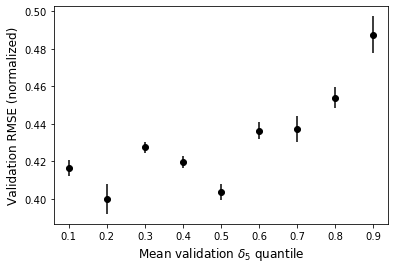

In [12]:
plt.errorbar(env_results[:,0],
             env_results[:,1] / norm_factors,
             env_results[:,2] / norm_factors, 
             c='k', marker='o', ls='none'
            )
plt.ylabel('Validation RMSE (normalized)', fontsize=12)
plt.xlabel(r'Mean validation $\delta_5$ quantile', fontsize=12)


plt.savefig(f'{PATH}/results/figures/environment-trends.png')

What are these in terms of log(1+$\delta$)?

In [13]:
logd5_mins

[-0.9512771319714821,
 -0.3464147312591956,
 -0.19929430882077506,
 -0.08421625976740237,
 0.024693458374723264,
 0.12543626023407864,
 0.23124272664225068,
 0.35749918946869436,
 0.4901058809783508]

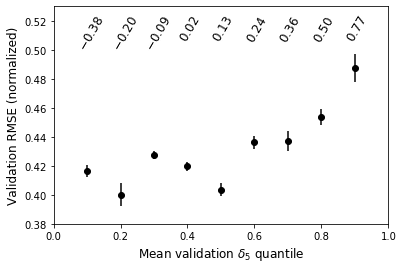

In [41]:
plt.errorbar(env_results[:,0],
             env_results[:,1] / norm_factors,
             env_results[:,2] / norm_factors, 
             c='k', marker='o', ls='none'
            )
plt.ylabel('Validation RMSE (normalized)', fontsize=12)
plt.xlabel(r'Mean validation $\delta_5$ quantile', fontsize=12)


for i in range(len(env_results)):
    d5_range = f'({logd5_mins[i]:.2f}, {logd5_maxes[i]:.2f})'
    d5_mean = f'${logd5_means[i]:.2f}$'
    plt.text(x=env_results[i,0] - 0.03, 
             y=0.525, # env_results[i,1] / norm_factors[i]+2e-3, 
             s=d5_mean, #d5_range, 
             rotation=60,
             va='top',
             fontsize=12
            )
    
plt.ylim(0.38, 0.53)
plt.xlim(0.0, 1.0);

plt.savefig(f'{PATH}/results/figures/environment-trends.png')